In [4]:
import sys
import scipy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#loading dataset
data = pd.read_csv('creditcard.csv')

In [36]:
#outlier fraud cases fraction determination
fraud_cases = data[data['Class'] == 1]
normal_cases = data[data['Class'] == 0]
fraud_fraction = len(fraud_cases) / float(len(normal_cases))

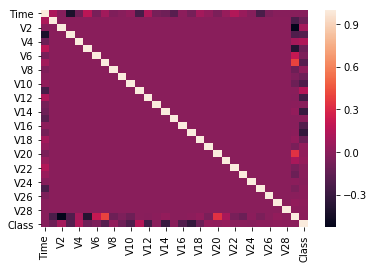

In [37]:
#correlation matrix
correlation_matrix = data.corr()
sns.heatmap (correlation_matrix)

In [38]:
#separating data set
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = data[columns]
Y = data["Class"]

In [39]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors  import LocalOutlierFactor

#defining states
state = 1

#defining outlier detection methods
classifiers = {
    "Isolation Forest" : IsolationForest(max_samples = len(X), contamination = fraud_fraction, random_state = state),
    
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = fraud_fraction)
}

In [ ]:
#model fitting
for i, (classifier_name, classifier) in enumerate(classifiers.items()):
    if classifier_name == "Local Outlier Factor":
        y_prediction = classifier.fit_predict(X)
        score_prediction = classifier.negative_outlier_factor_
    else:
        classifier.fit(X)
        score_prediction = classifier.decision_function(X)
        y_prediction = classifier.predict(X)
        
    #changing the prediction values to 0 and 1(fraudulent)
    y_prediction[y_prediction == 1] = 0
    y_prediction[y_prediction == -1] = 1
        
    n_errors = (y_prediction != Y).sum()
        
    #classification metrics
    print ('{} : {}'.format(classifier_name, n_errors))
    print (accuracy_score(Y, y_prediction))
    print (classification_report(Y, y_prediction))